## **CIS 509 - FINAL PROJECT**

GOAL :
To empower restaurant owners with a data-driven understanding of market dynamics in the city of Goleta with Mexican categories.

Exploring the Sentiment analysis, Topic modeling & Recommendation systems.

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

review_file_path = '/content/drive/My Drive/CIS 509/yelp_academic_dataset_review.json'

chunk_size = 100000
review_chunks = []
# Read the Review JSON file in chunks
for review_chunk in pd.read_json(review_file_path, lines=True, chunksize=chunk_size):
    review_chunks.append(review_chunk)

review_df = pd.concat(review_chunks, ignore_index=True)

print("Review DataFrame Info:")
print(review_df.info())

Mounted at /content/drive
Review DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB
None


In [3]:
business_file_path = '/content/drive/My Drive/CIS 509/yelp_academic_dataset_business.json'
business_chunks = []
for business_chunk in pd.read_json(business_file_path, lines=True, chunksize=chunk_size):
    business_chunks.append(business_chunk)
business_df = pd.concat(business_chunks, ignore_index=True)
print("\nBusiness DataFrame Info:")
print(business_df.info())


Business DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


In [4]:
# Merge the Review and Business DataFrames on 'business_id'
merged_df = pd.merge(review_df, business_df, on='business_id', how='inner')

# Display the merged DataFrame information
print("Merged DataFrame Info:")
print(merged_df.info())

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   review_id     object        
 1   user_id       object        
 2   business_id   object        
 3   stars_x       int64         
 4   useful        int64         
 5   funny         int64         
 6   cool          int64         
 7   text          object        
 8   date          datetime64[ns]
 9   name          object        
 10  address       object        
 11  city          object        
 12  state         object        
 13  postal_code   object        
 14  latitude      float64       
 15  longitude     float64       
 16  stars_y       float64       
 17  review_count  int64         
 18  is_open       int64         
 19  attributes    object        
 20  categories    object        
 21  hours         object        
dtypes: datetime64[ns](1), float64(3), int64(6),

In [5]:
print("\nMerged DataFrame Head:")
print(merged_df.tail())


Merged DataFrame Head:
                      review_id                 user_id  \
6990275  0gai4MzBzFCa7JsS31RRjg  xHu1jmrnv4DdJMuC8IxeRg   
6990276  7MZu6bFdFoqr7MyPKqvoew  aYveEctPYcZiubXyEgLhTA   
6990277  3emHuLQvuAw0l66TzSWmKA  oz-So7Kwo5tW51HrT-BgIg   
6990278  T-adPwD-eP2LvuDINKOA9g  09zj3b4tM-xJjozvtk34wQ   
6990279  lKSY-hIMd9MX8Z5fRpUgDg  hyfUdXDmgqA4GI3S11I69w   

                    business_id  stars_x  useful  funny  cool  \
6990275  vI4vyi1dfG93oAiSRFDymA        1       2      0     0   
6990276  vI4vyi1dfG93oAiSRFDymA        5       4      1     2   
6990277  vI4vyi1dfG93oAiSRFDymA        1       0      0     0   
6990278  vI4vyi1dfG93oAiSRFDymA        1       0      0     0   
6990279  vI4vyi1dfG93oAiSRFDymA        5       0      0     0   

                                                      text  \
6990275  Ridiculous wait times. I showed up right on ti...   
6990276  Love this office. All the staff us super kind ...   
6990277  It was a HUGE mistake to give this 

In [6]:
print("\nMerged DataFrame Description:")
print(merged_df.describe())


Merged DataFrame Description:
            stars_x        useful         funny          cool      latitude  \
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06   
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01  3.594839e+01   
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00  5.347206e+00   
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  2.755513e+01   
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.996448e+01   
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.860392e+01   
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  3.994312e+01   
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02  5.367920e+01   

          longitude       stars_y  review_count       is_open  
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06  
mean  -8.972830e+01  3.751328e+00  3.691714e+02  8.284695e-01  
std    1.488738e+01  7.539346e-01  7.360792e+02  3.769719e-01  
m

In [7]:
# Drop rows with missing values
merged_df.dropna(inplace=True)

In [8]:
# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

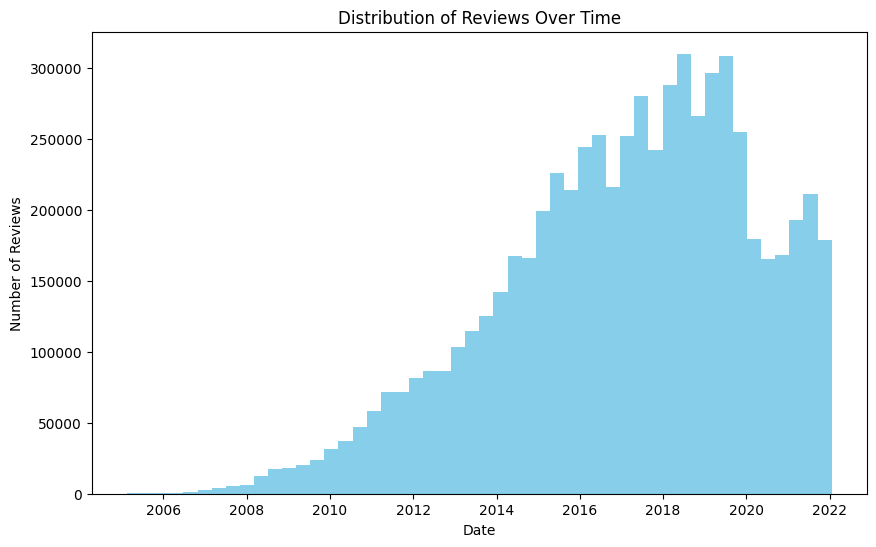

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a histogram of review counts over time
merged_df['date'].hist(bins=50, color='skyblue')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(False)

# Show the plot
plt.show()

Earliest Date in Dataset: 2005-02-16

Latest Date in Dataset: 2022-01-19

In [10]:
merged_df.tail()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
6990275,0gai4MzBzFCa7JsS31RRjg,xHu1jmrnv4DdJMuC8IxeRg,vI4vyi1dfG93oAiSRFDymA,1,2,0,0,Ridiculous wait times. I showed up right on ti...,2018-06-05 14:25:32,Aesthetic Dermatology Associates,...,PA,19301,40.045448,-75.50114,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990276,7MZu6bFdFoqr7MyPKqvoew,aYveEctPYcZiubXyEgLhTA,vI4vyi1dfG93oAiSRFDymA,5,4,1,2,Love this office. All the staff us super kind ...,2020-02-17 01:53:23,Aesthetic Dermatology Associates,...,PA,19301,40.045448,-75.50114,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990277,3emHuLQvuAw0l66TzSWmKA,oz-So7Kwo5tW51HrT-BgIg,vI4vyi1dfG93oAiSRFDymA,1,0,0,0,It was a HUGE mistake to give this place a try...,2021-09-22 16:51:46,Aesthetic Dermatology Associates,...,PA,19301,40.045448,-75.50114,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990278,T-adPwD-eP2LvuDINKOA9g,09zj3b4tM-xJjozvtk34wQ,vI4vyi1dfG93oAiSRFDymA,1,0,0,0,Friendly staff but the praise ends there. Gett...,2021-03-09 19:21:44,Aesthetic Dermatology Associates,...,PA,19301,40.045448,-75.50114,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990279,lKSY-hIMd9MX8Z5fRpUgDg,hyfUdXDmgqA4GI3S11I69w,vI4vyi1dfG93oAiSRFDymA,5,0,0,0,Had a great experience! Professional and frien...,2018-07-20 16:11:21,Aesthetic Dermatology Associates,...,PA,19301,40.045448,-75.50114,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."


In [11]:
# Total number of reviews
total_reviews = merged_df.shape[0]

# Total number of unique restaurants
total_restaurants = merged_df['business_id'].nunique()

# Total number of unique users
total_users = merged_df['user_id'].nunique()

print("Total Reviews:", total_reviews)
print("Total Restaurants:", total_restaurants)
print("Total Users:", total_users)

Total Reviews: 6456810
Total Restaurants: 117618
Total Users: 1878672


No of Reviews : 6,456,810

No of Restaurants : 117,618

No of Users :  1,878,672

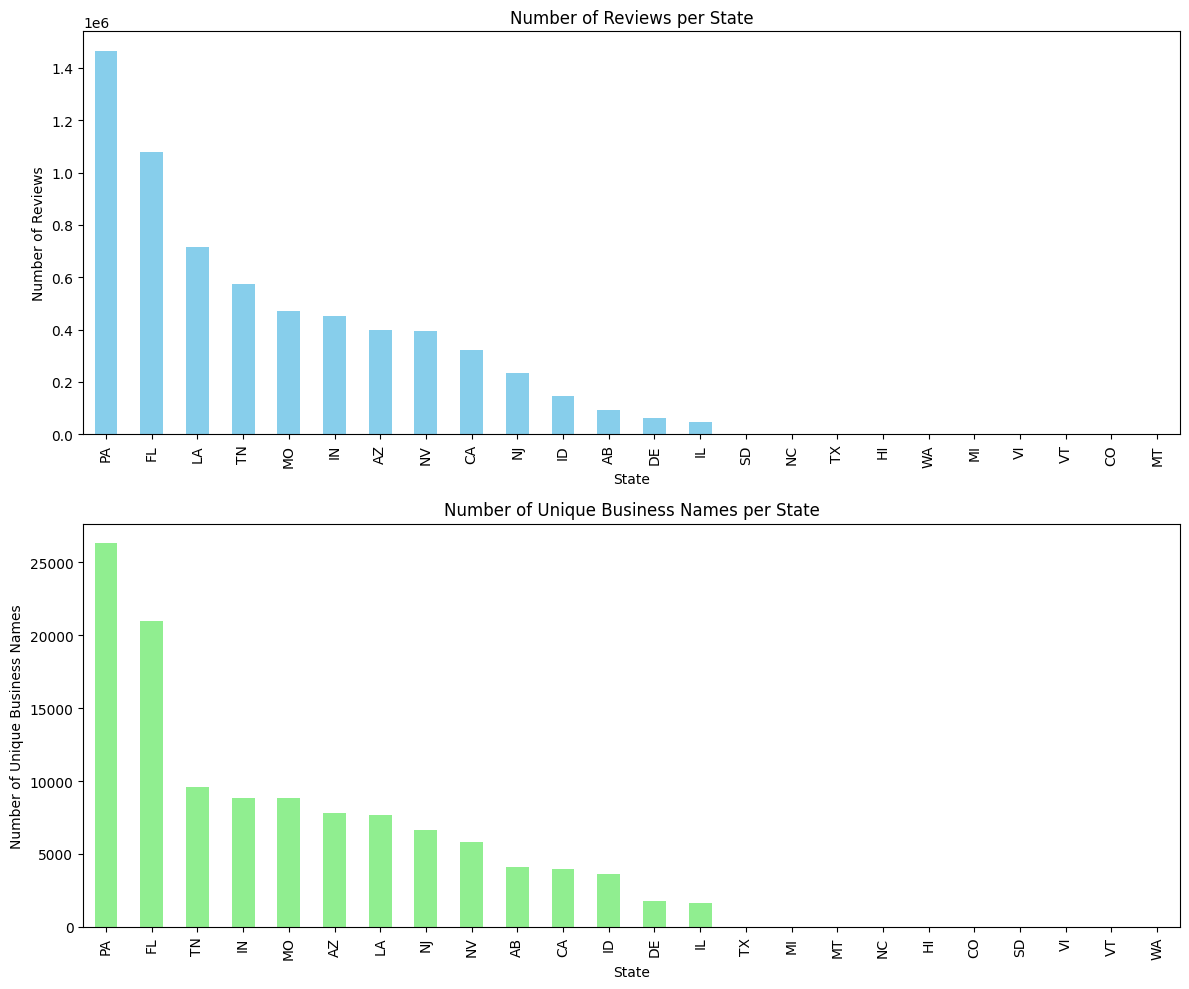

In [12]:
# Calculate the number of reviews and unique business names per state
reviews_per_state = merged_df.groupby('state')['review_id'].count().sort_values(ascending=False)
unique_business_per_state = merged_df.groupby('state')['business_id'].nunique().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot the number of reviews per state
reviews_per_state.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Reviews per State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Reviews')

# Plot the number of unique business names per state
unique_business_per_state.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Number of Unique Business Names per State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Unique Business Names')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the analysis from the state columns with respect to the Number of Reviews & Number Unique Businessess. We are filtering down to the California state for betterment of Business analysis.

In [13]:
# Filter the dataset to include only data from California
california_df = merged_df[merged_df['state'] == 'CA']

# Display basic information about the filtered DataFrame
print("California DataFrame Info:")
print(california_df.info())

California DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 323053 entries, 1375 to 6989977
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   review_id     323053 non-null  object        
 1   user_id       323053 non-null  object        
 2   business_id   323053 non-null  object        
 3   stars_x       323053 non-null  int64         
 4   useful        323053 non-null  int64         
 5   funny         323053 non-null  int64         
 6   cool          323053 non-null  int64         
 7   text          323053 non-null  object        
 8   date          323053 non-null  datetime64[ns]
 9   name          323053 non-null  object        
 10  address       323053 non-null  object        
 11  city          323053 non-null  object        
 12  state         323053 non-null  object        
 13  postal_code   323053 non-null  object        
 14  latitude      323053 non-null  float6

In [14]:
# Calculate number of reviews by city
reviews_by_city = california_df.groupby('city')['review_id'].count().reset_index()
reviews_by_city.columns = ['City', 'Number of Reviews']

# Calculate number of unique businesses by city
unique_businesses_by_city = california_df.groupby('city')['business_id'].nunique().reset_index()
unique_businesses_by_city.columns = ['City', 'Number of Unique Businesses']

# Merge the two DataFrames on 'City' to get the final city_distribution DataFrame
city_distribution = pd.merge(reviews_by_city, unique_businesses_by_city, on='City')

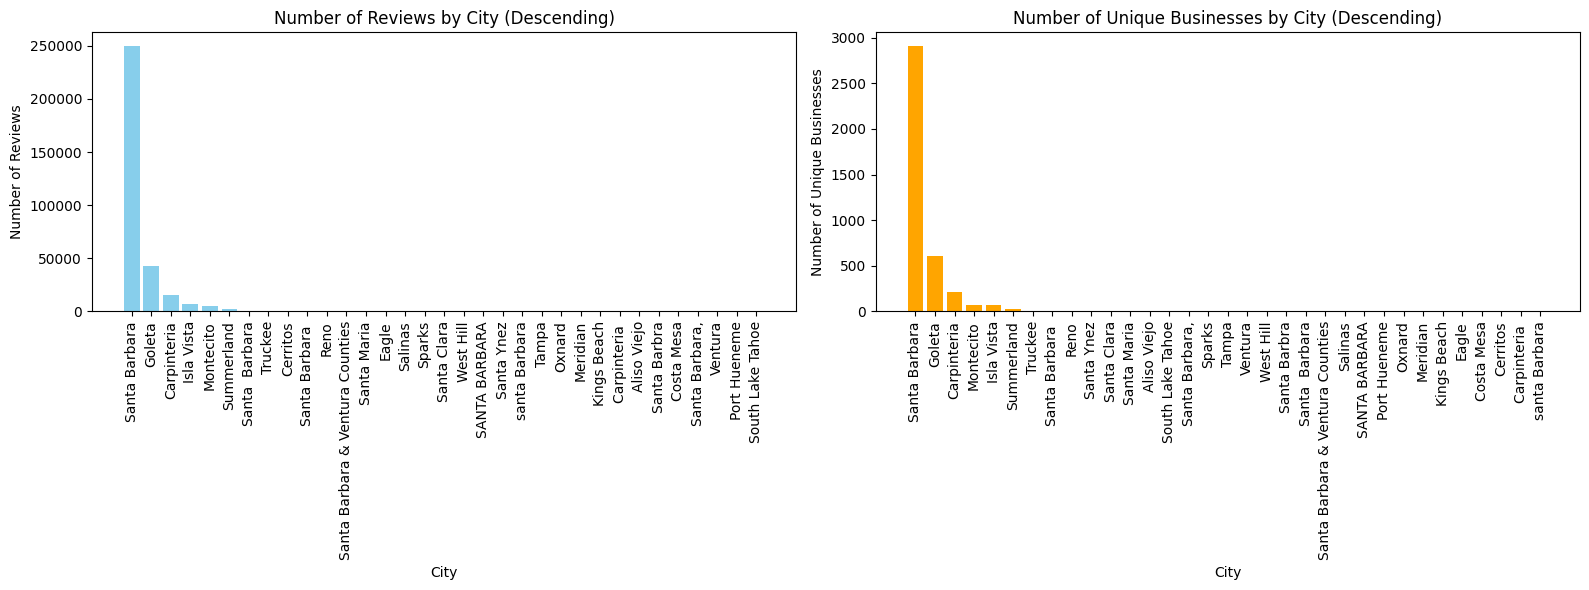

In [15]:
# Sort the city distribution DataFrame by the number of reviews and number of unique businesses in descending order
city_distribution_sorted_reviews = city_distribution.sort_values(by='Number of Reviews', ascending=False)
city_distribution_sorted_unique = city_distribution.sort_values(by='Number of Unique Businesses', ascending=False)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot number of reviews
axs[0].bar(city_distribution_sorted_reviews['City'], city_distribution_sorted_reviews['Number of Reviews'], color='skyblue')
axs[0].set_title('Number of Reviews by City (Descending)')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Number of Reviews')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plot number of unique businesses
axs[1].bar(city_distribution_sorted_unique['City'], city_distribution_sorted_unique['Number of Unique Businesses'], color='orange')
axs[1].set_title('Number of Unique Businesses by City (Descending)')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Number of Unique Businesses')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Based on the analysis from the cities columns in California with respect to the Number of Reviews & Number Unique Businessess. We are filtering down to the Goleta city for betterment of Business analysis.

In [16]:
# Filter the dataset for Goleta
goleta_df = california_df[california_df['city'] == 'Goleta']

# Display basic information about the filtered DataFrame
print("Goleta DataFrame Info:")
print(goleta_df.info())

Goleta DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42443 entries, 11316 to 6984676
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     42443 non-null  object        
 1   user_id       42443 non-null  object        
 2   business_id   42443 non-null  object        
 3   stars_x       42443 non-null  int64         
 4   useful        42443 non-null  int64         
 5   funny         42443 non-null  int64         
 6   cool          42443 non-null  int64         
 7   text          42443 non-null  object        
 8   date          42443 non-null  datetime64[ns]
 9   name          42443 non-null  object        
 10  address       42443 non-null  object        
 11  city          42443 non-null  object        
 12  state         42443 non-null  object        
 13  postal_code   42443 non-null  object        
 14  latitude      42443 non-null  float64       
 15  longitu

In [17]:
# Output the filtered DataFrame to the same location
output_path = "/content/drive/My Drive/CIS 509/goleta_data.csv"
goleta_df.to_csv(output_path, index=False)
print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/My Drive/CIS 509/goleta_data.csv


In [19]:
# Mount Google Drive
drive.mount('/content/drive')

import pandas as pd

# File path
final_file_path = '/content/drive/My Drive/CIS 509/goleta_data.csv'

# Read the CSV file
goleta_df = pd.read_csv(final_file_path)

# Print DataFrame info
print("Review DataFrame Info:")
print(goleta_df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Review DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42443 entries, 0 to 42442
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     42443 non-null  object 
 1   user_id       42443 non-null  object 
 2   business_id   42443 non-null  object 
 3   stars_x       42443 non-null  int64  
 4   useful        42443 non-null  int64  
 5   funny         42443 non-null  int64  
 6   cool          42443 non-null  int64  
 7   text          42443 non-null  object 
 8   date          42443 non-null  object 
 9   name          42443 non-null  object 
 10  address       41953 non-null  object 
 11  city          42443 non-null  object 
 12  state         42443 non-null  object 
 13  postal_code   42443 non-null  int64  
 14  latitude      42443 non-null  float64
 15  lon

In [20]:
# Total number of reviews in Goleta
total_reviews_goleta = goleta_df.shape[0]

# Total number of unique restaurants in Goleta
total_restaurants_goleta = goleta_df['business_id'].nunique()

# Total number of unique users in Goleta
total_users_goleta = goleta_df['user_id'].nunique()

print("Total Reviews in Goleta:", total_reviews_goleta)
print("Total Unique Restaurants in Goleta:", total_restaurants_goleta)
print("Total Unique Users in Goleta:", total_users_goleta)

Total Reviews in Goleta: 42443
Total Unique Restaurants in Goleta: 609
Total Unique Users in Goleta: 24738


#Before data filter:

No of Reviews   : 6,456,810

No of Restaurants : 117,618

No of Users     : 1,878,672
___________________________________________________

#After data filter (for Goleta):

Total Reviews in Goleta        : 42,443

Total Unique Restaurants in Goleta: 609

Total Unique Users in Goleta   : 24,738


In [21]:
import plotly.express as px

# Create a scatter map plot using Plotly Express
fig = px.scatter_mapbox(goleta_df, lat="latitude", lon="longitude",
                        hover_name="name", hover_data=["stars_y"],
                        color="stars_y", color_continuous_scale="viridis",
                        size_max=15, zoom=12)

# Update map layout
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

High rating of the stars are found the right side cluster which is closer to the Santa Barbara city.

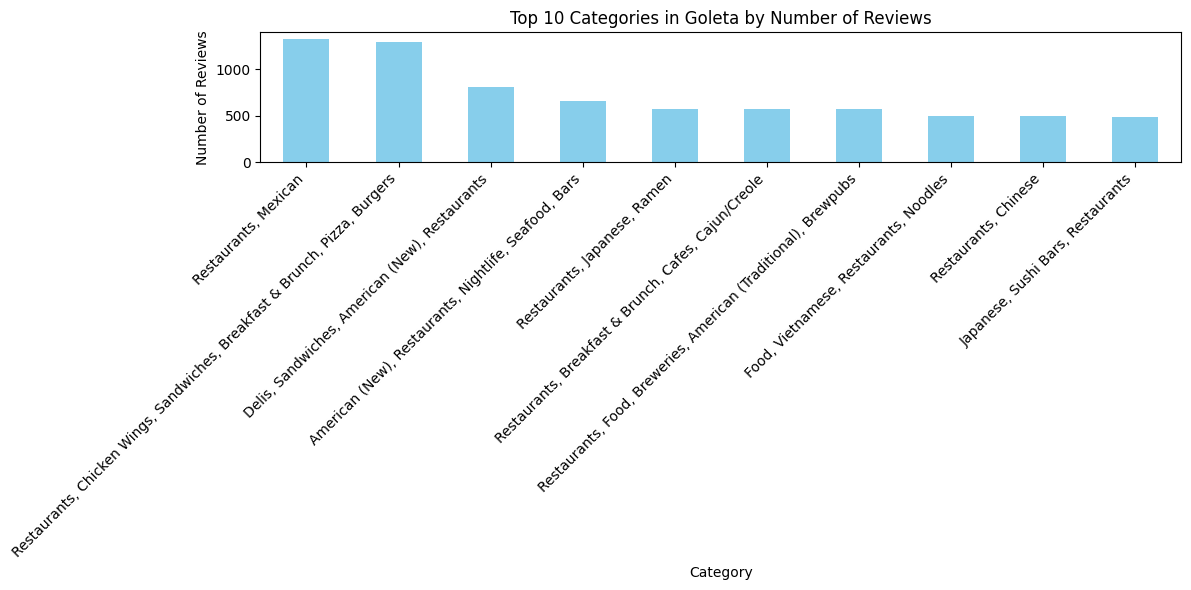

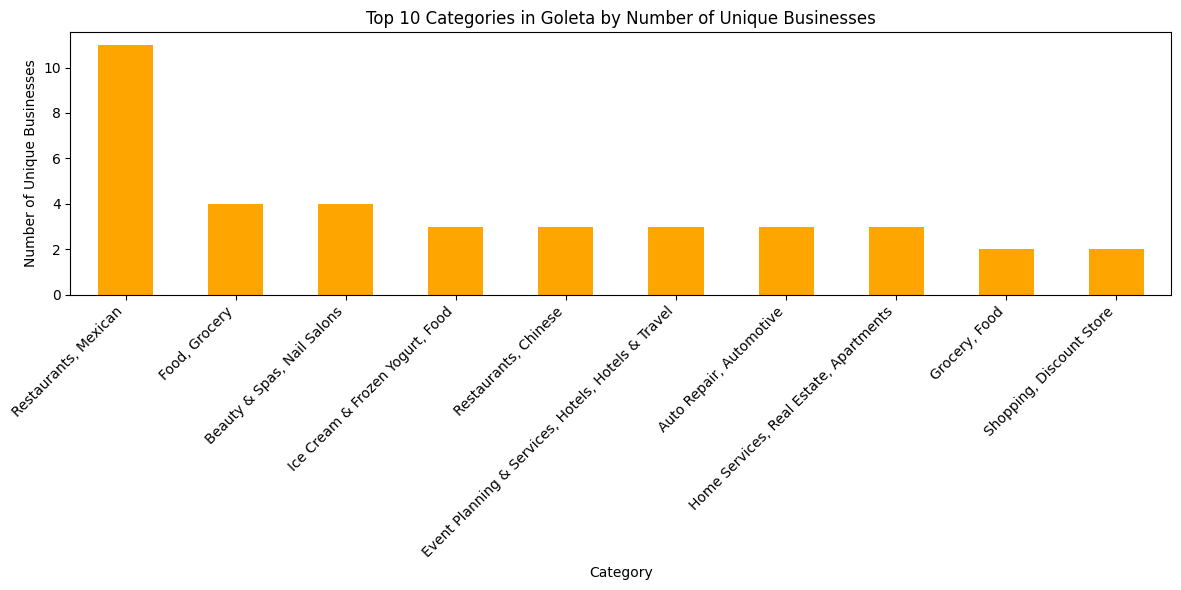

In [22]:
# Calculate the number of reviews and unique businesses for each category
reviews_by_category = goleta_df.groupby('categories')['review_id'].count()
unique_businesses_by_category = goleta_df.groupby('categories')['business_id'].nunique()

# Get the top 10 categories based on the number of reviews
top_10_reviews_categories = reviews_by_category.sort_values(ascending=False).head(10)

# Get the top 10 categories based on the number of unique businesses
top_10_unique_businesses_categories = unique_businesses_by_category.sort_values(ascending=False).head(10)

# Plot the number of reviews by category
plt.figure(figsize=(12, 6))
top_10_reviews_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories in Goleta by Number of Reviews')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the number of unique businesses by category
plt.figure(figsize=(12, 6))
top_10_unique_businesses_categories.plot(kind='bar', color='orange')
plt.title('Top 10 Categories in Goleta by Number of Unique Businesses')
plt.xlabel('Category')
plt.ylabel('Number of Unique Businesses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the analysis from the Cateogry column with respect to the Number of Reviews & Number Unique Businessess. We are filtering down to the Category Mexican for betterment of Business analysis.

In [23]:
# Filter the dataset for Mexican restaurants
mexican_df = goleta_df[goleta_df['categories'].str.contains('Mexican', case=False, na=False)]

# Display basic information about the filtered DataFrame
print("Mexican Restaurant DataFrame Info:")
print(mexican_df.info())

Mexican Restaurant DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 336 to 42336
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     3899 non-null   object 
 1   user_id       3899 non-null   object 
 2   business_id   3899 non-null   object 
 3   stars_x       3899 non-null   int64  
 4   useful        3899 non-null   int64  
 5   funny         3899 non-null   int64  
 6   cool          3899 non-null   int64  
 7   text          3899 non-null   object 
 8   date          3899 non-null   object 
 9   name          3899 non-null   object 
 10  address       3899 non-null   object 
 11  city          3899 non-null   object 
 12  state         3899 non-null   object 
 13  postal_code   3899 non-null   int64  
 14  latitude      3899 non-null   float64
 15  longitude     3899 non-null   float64
 16  stars_y       3899 non-null   float64
 17  review_count  3899 non-null   int

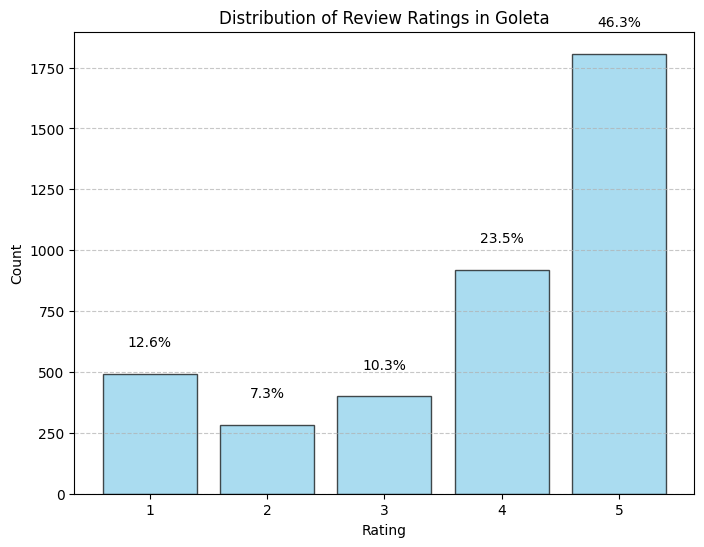

In [24]:
# Calculate counts and percentages
rating_counts = mexican_df['stars_x'].value_counts().sort_index()
total_reviews = rating_counts.sum()
rating_percentages = rating_counts / total_reviews * 100

# Plot the distribution of review ratings
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts, color='skyblue', edgecolor='black', alpha=0.7)

# Add percentages above each bar
for bar, percentage in zip(bars, rating_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Review Ratings in Goleta')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now we are going to try out the SENTIMENT ANALYSIS part of the Business Analysis

In [25]:
#Required libraries
!pip install textblob
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
#Import the necessary modules
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate polarity score using TextBlob
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate compound score using VADER
def calculate_compound(text):
    return sid.polarity_scores(text)['compound']

# Function to calculate super score based on Yelp rating, polarity score, and compound score
def calculate_super_score(yelp_rating, polarity_score, compound_score):
    super_score = yelp_rating + polarity_score
    super_score *= compound_score
    super_score = max(0, min(super_score, 6))  # Ensure range [0, 6]
    return super_score

In [29]:
# Calculate polarity score and compound score for each review
mexican_df['polarity_score'] = mexican_df['text'].apply(calculate_polarity)
mexican_df['compound_score'] = mexican_df['text'].apply(calculate_compound)

# Calculate super score
mexican_df['super_score'] = mexican_df.apply(lambda row: calculate_super_score(row['stars_x'], row['polarity_score'], row['compound_score']), axis=1)

<ipython-input-29-d0016d5cc5a4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-d0016d5cc5a4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-d0016d5cc5a4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
mexican_df.tail()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,polarity_score,compound_score,super_score
42332,82R41V7T58WPNuYTdykvNw,7DYuK97ZFhi4koygsooSRw,iT78kOB6Ja3BJQdYipPa5g,5,0,0,0,Excellent food and wonderful staff. They have...,2020-07-15 03:24:52,Los Arroyos Mexican Restaurant & Take Out,...,-119.825391,3.5,85,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'W...","Restaurants, Mexican, Breakfast & Brunch","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.000000,0.9199,5.519400
42333,Tn9oDsie__0mXkUu8q-FLg,WengOKBeXVK3nc4dhb9Wkw,iT78kOB6Ja3BJQdYipPa5g,5,18,3,15,Absolutely phenomenal experience! If I could g...,2020-03-08 04:31:43,Los Arroyos Mexican Restaurant & Take Out,...,-119.825391,3.5,85,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'W...","Restaurants, Mexican, Breakfast & Brunch","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.400000,0.9709,5.242860
42334,eSkZHXCwMvmD27u_HXyRWg,kC3t2nb6_2mXePVdzZBmcw,iT78kOB6Ja3BJQdYipPa5g,5,1,1,1,I ordered to go and ordered the chilie rellien...,2021-11-12 03:39:56,Los Arroyos Mexican Restaurant & Take Out,...,-119.825391,3.5,85,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'W...","Restaurants, Mexican, Breakfast & Brunch","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.303333,0.9205,4.881718
42335,l2C-VTgwYmuTQOtZlW1YoA,IgF-YbqdOsfFCpp6h57OMw,iT78kOB6Ja3BJQdYipPa5g,5,0,0,0,We order Los Arroyos OFTEN...but tonight they ...,2021-06-27 03:45:36,Los Arroyos Mexican Restaurant & Take Out,...,-119.825391,3.5,85,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'W...","Restaurants, Mexican, Breakfast & Brunch","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.200000,0.8221,4.274920
42336,UKSGqYVh1g5opUOM4FLIlQ,ut4UutJ_wDVkSaJtf9Ic3A,iT78kOB6Ja3BJQdYipPa5g,5,0,0,0,Amazing dishes & great customer service! This ...,2021-11-24 03:49:21,Los Arroyos Mexican Restaurant & Take Out,...,-119.825391,3.5,85,1,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'W...","Restaurants, Mexican, Breakfast & Brunch","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.642857,0.9824,5.543543


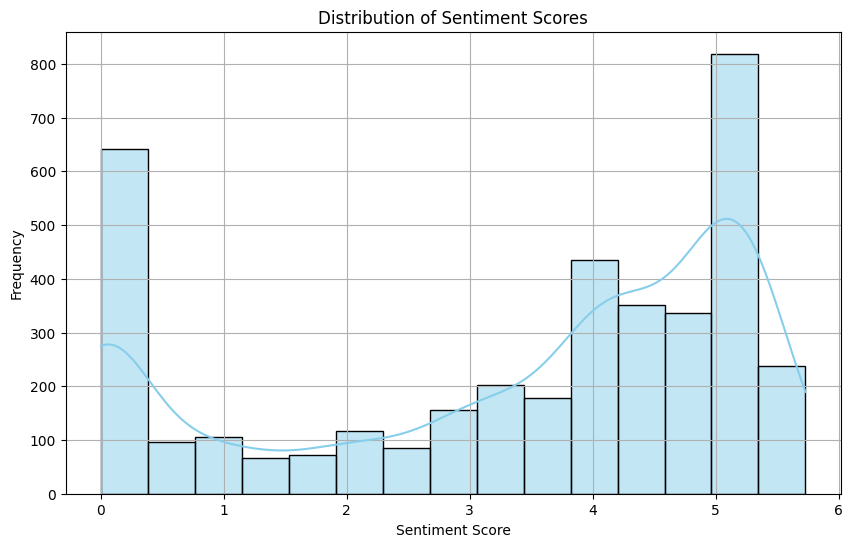

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(mexican_df['super_score'], kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

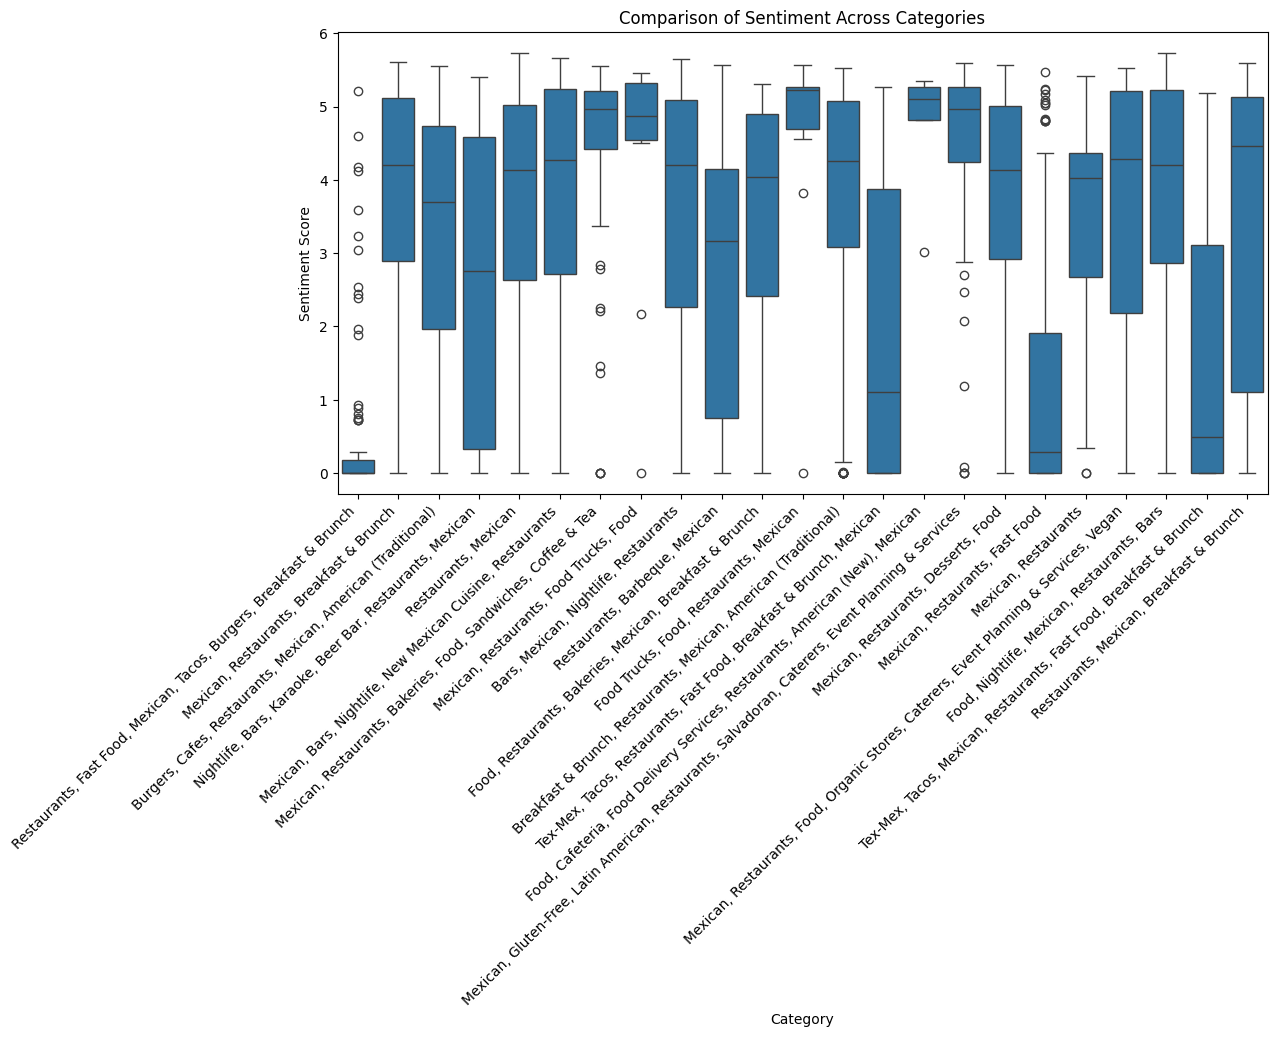

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='super_score', data=mexican_df)
plt.title('Comparison of Sentiment Across Categories')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')

plt.show()

In [38]:
# Group by business and calculate the average sentiment score for reviews associated with each business
average_sentiment_by_business = mexican_df.groupby('name')['super_score'].mean()

# Merge mexican_df with average_sentiment_by_business using a left merge
merged_df = pd.merge(mexican_df, average_sentiment_by_business, on='name', suffixes=('_original', '_average'))

# Sort by sentiment score
merged_df_sorted = merged_df.sort_values(by='super_score_average', ascending=False)

# Drop duplicate businesses to keep only the first occurrence
unique_businesses = merged_df_sorted.drop_duplicates(subset='business_id', keep='first')

# Extract relevant columns including business_id
unique_businesses_info = unique_businesses[['business_id', 'name', 'city', 'state', 'categories', 'super_score_average', 'stars_x', 'stars_y', 'review_count']]

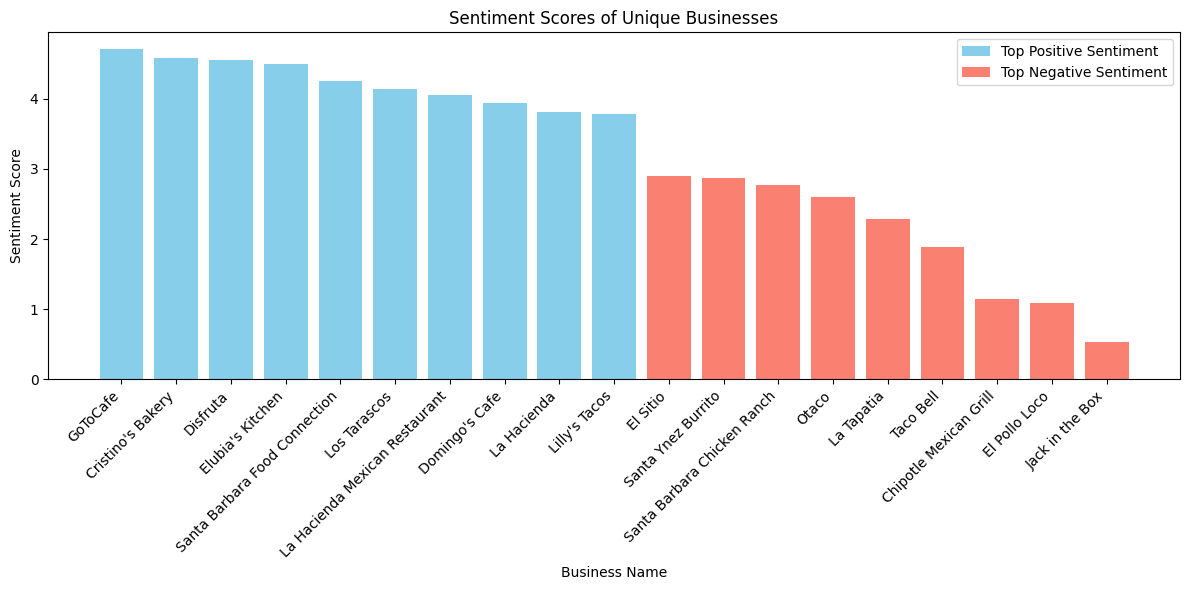

In [39]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot top positive businesses
plt.bar(unique_businesses_info['name'][:10], unique_businesses_info['super_score_average'][:10], color='skyblue', label='Top Positive Sentiment')

# Plot top negative businesses
plt.bar(unique_businesses_info['name'][-10:], unique_businesses_info['super_score_average'][-10:], color='salmon', label='Top Negative Sentiment')

plt.title('Sentiment Scores of Unique Businesses')
plt.xlabel('Business Name')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels by 45 degrees and adjust alignment
plt.legend()
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

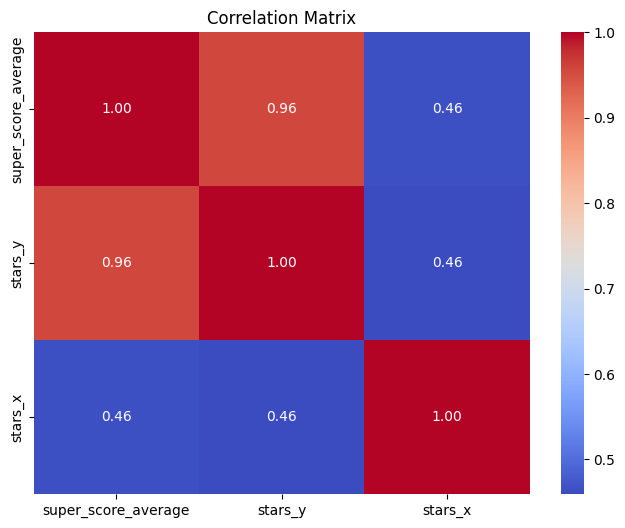

In [40]:
# Calculate correlation matrix
correlation_matrix = unique_businesses_info[['super_score_average', 'stars_y', 'stars_x']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show

<ipython-input-41-9dc3e7b6ff40>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




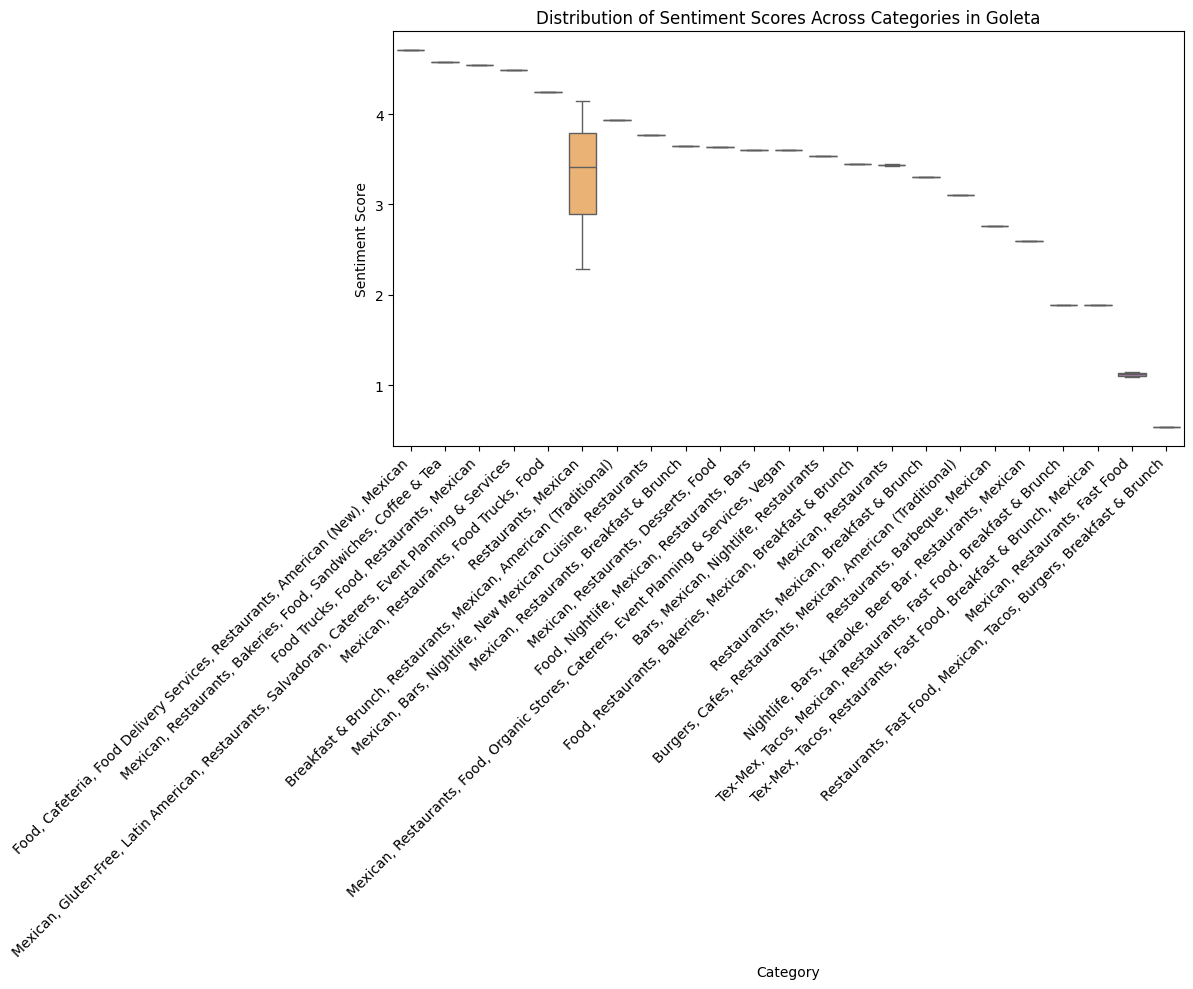

In [41]:
# Create a box plot of sentiment scores for each category
plt.figure(figsize=(12, 10))
sns.boxplot(x='categories', y='super_score_average', data=unique_businesses_info, palette='Set3')
plt.title('Distribution of Sentiment Scores Across Categories in Goleta')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

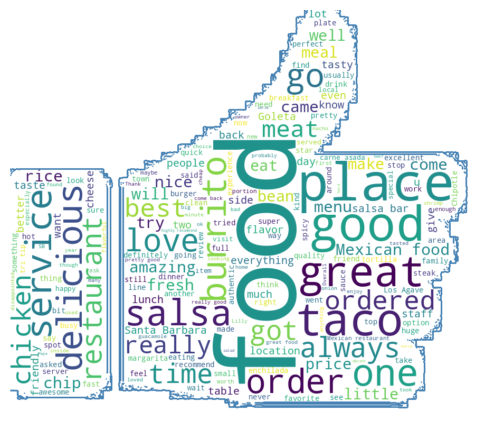

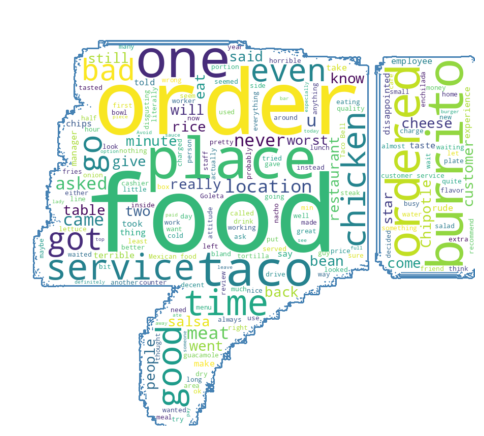

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to generate word clouds with custom mask images
def generate_wordcloud(text, mask_image, save_path):
    mask = np.array(Image.open(mask_image))
    wc = WordCloud(background_color="white", mask=mask, contour_color='steelblue', contour_width=2)
    wc.generate(text)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Define the file paths for thumbs up and thumbs down mask images
thumbs_up_mask_path = '/content/drive/My Drive/CIS 509/up.jpg'
thumbs_down_mask_path = '/content/drive/My Drive/CIS 509/down.jpg'

# Extract positive and negative words based on sentiment scores
positive_words = ' '.join(mexican_df[mexican_df['compound_score'] > 0]['text'])
negative_words = ' '.join(mexican_df[mexican_df['compound_score'] < 0]['text'])

# Generate word cloud with thumbs up for positive words
generate_wordcloud(positive_words, thumbs_up_mask_path, "positive_wordcloud.jpg")

# Generate word cloud with thumbs down for negative words
generate_wordcloud(negative_words, thumbs_down_mask_path, "negative_wordcloud.jpg")

Now we are going to try out the **TOPIC MODELLING** part of the Business Analysis
# **TOPIC MODELLING**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
text_data = mexican_df['text']

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectorized_data = vectorizer.fit_transform(text_data)

# Train LDA model
num_topics = 10  # Specify the number of topics
lda_model = LDA(n_components=num_topics, learning_method='online', random_state=42)
lda_model.fit(vectorized_data)

# Print the topics
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx+1}:")
    top_words_indices = topic.argsort()[-10:]
    top_words = [feature_names[i] for i in top_words_indices]
    print(top_words)
    print()

Topic 1:
['soft', 'mexican', 'cal', 'bell', 'tuesday', 'tacos', 'best', 'barbara', 'santa', 'taco']

Topic 2:
['en', 'jerry', 'el', 'que', 'bakery', 'pan', 'elubia', 'muy', 'la', 'pupusas']

Topic 3:
['round', 'guests', 'ladies', 'break', 'bathroom', 'standards', 'pupusa', 'complaint', 'talking', 'consistent']

Topic 4:
['don', 'place', 'didn', 'ordered', 'service', 'time', 'like', 'order', 'just', 'food']

Topic 5:
['chicken', 'delicious', 'burrito', 'service', 'mexican', 'salsa', 'place', 'great', 'good', 'food']

Topic 6:
['dish', 'multiple', 'eyes', 'picked', 'zero', 'talk', 'menudo', 'al', 'slow', 'pastor']

Topic 7:
['omelette', 'line', 'online', 'placed', 'working', 'register', 'service', 'relleno', 'girl', 'needs']

Topic 8:
['line', 'beef', 'onions', 'salsa', 'lilly', 'asada', 'tortillas', 'meat', 'taco', 'tacos']

Topic 9:
['stingy', 'sangria', 'birria', 'bakery', 'juice', 'cristino', 'huevos', 'paloma', '11', 'life']

Topic 10:
['chip', 'style', 'hacienda', 'pepe', 'inexpens

In [33]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 561.3 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [43]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_lg")

# Process documents and extract relevant tokens
processed_documents = []
for index, row in mexican_df.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5:
        continue  # Exclude comments with five or fewer words
    else:
        processed_document = [token.lemma_ for token in doc if not token.is_stop and nlp.vocab.has_vector(token.text)]
        processed_documents.append(processed_document)

In [45]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [46]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models

# Create a dictionary
dictionary = corpora.Dictionary(processed_documents)

# Create bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

In [47]:
# 2. Topic Distribution
topic_distribution = lda_model.transform(vectorized_data)
print("Topic Distribution for First Document:")
print(topic_distribution[0])  # Example: Print topic distribution for the first document

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic Distribution for First Document:
[0.00204106 0.00204082 0.00204099 0.666271   0.00204117 0.31740028
 0.00204192 0.00204113 0.00204082 0.00204082]


In [48]:
# 3. Document Allocation
dominant_topics = [sorted(enumerate(doc), key=lambda x: x[1], reverse=True)[0][0] for doc in topic_distribution]
print("Dominant Topics for First 5 Documents:")
print(dominant_topics[:5])  # Example: Print dominant topics for the first 5 documents

Dominant Topics for First 5 Documents:
[3, 3, 3, 3, 3]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



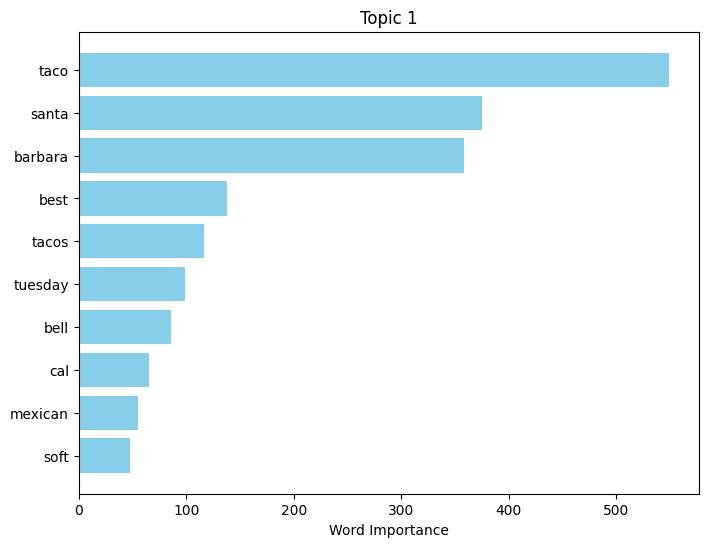

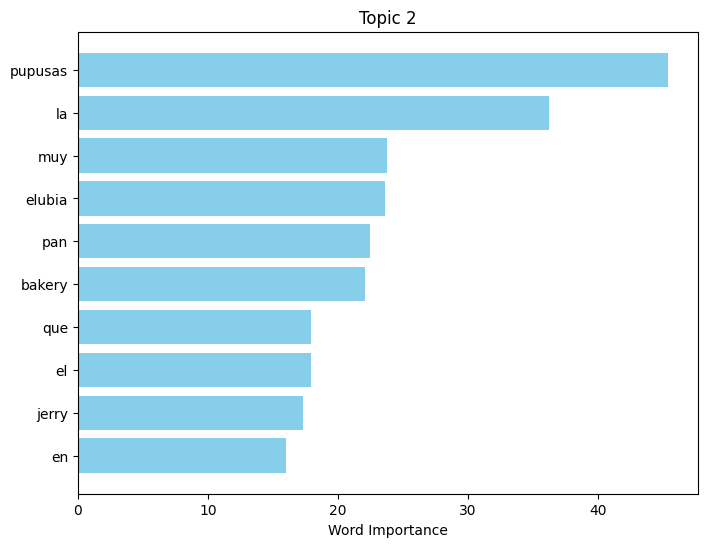

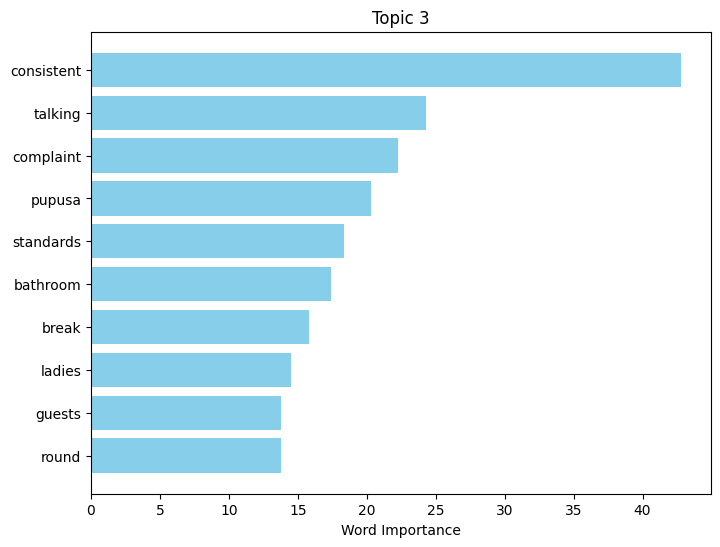

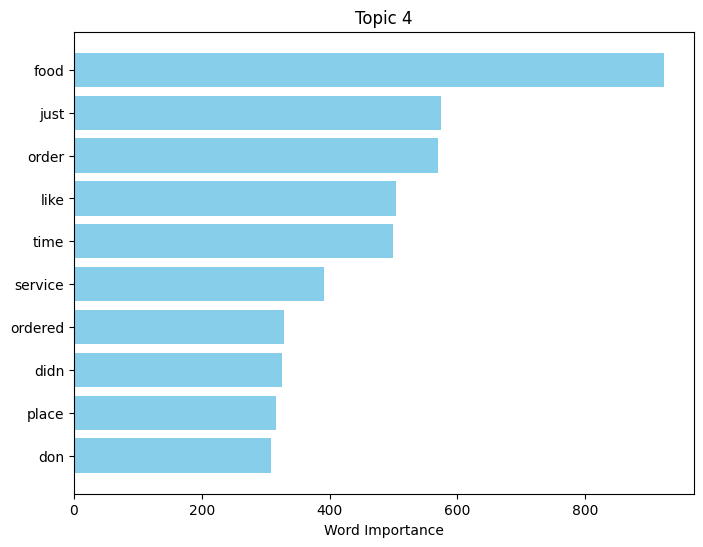

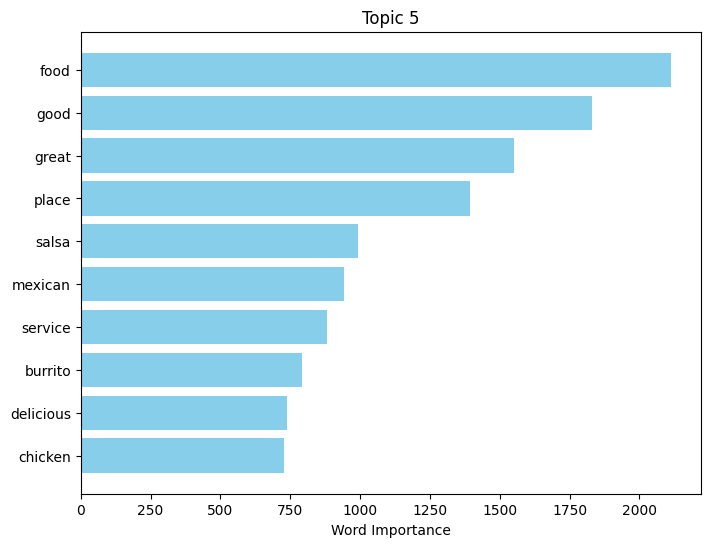

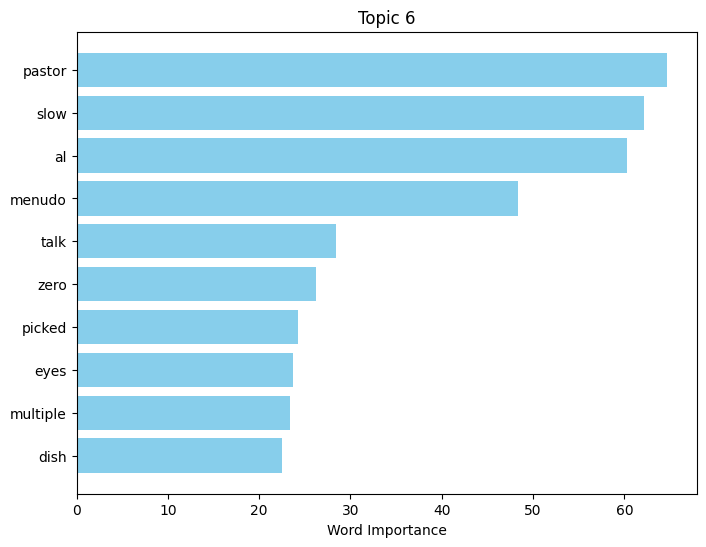

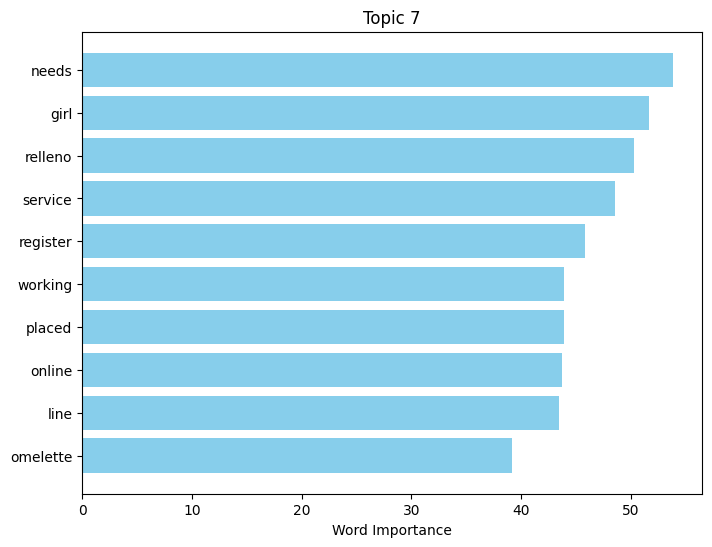

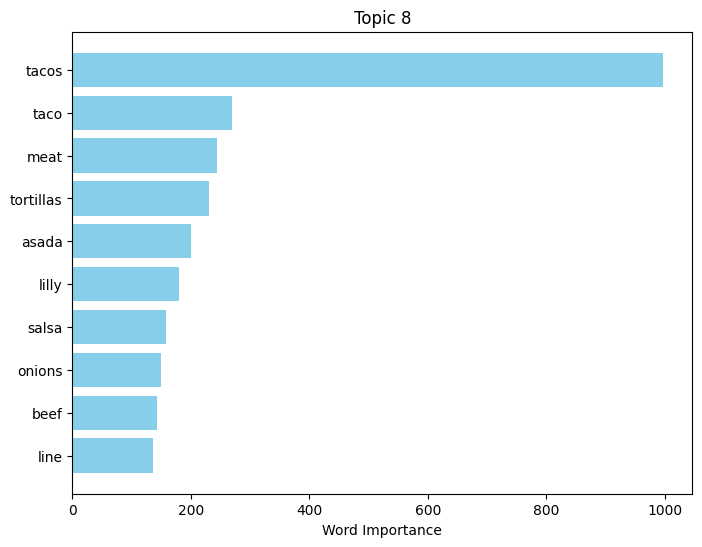

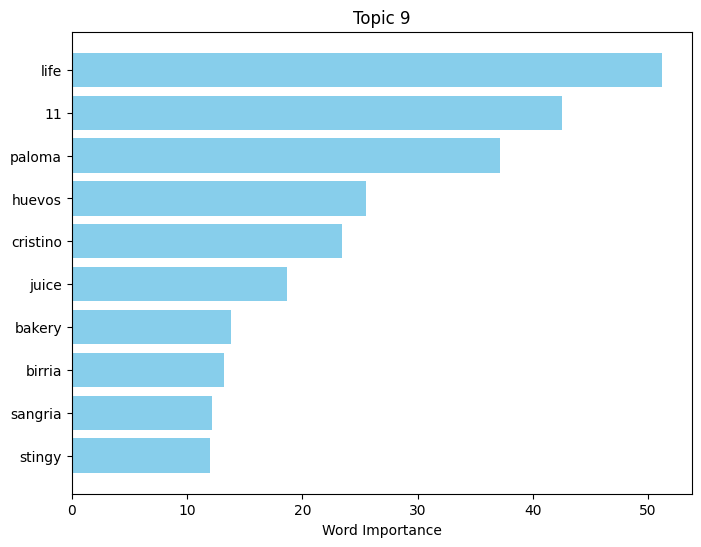

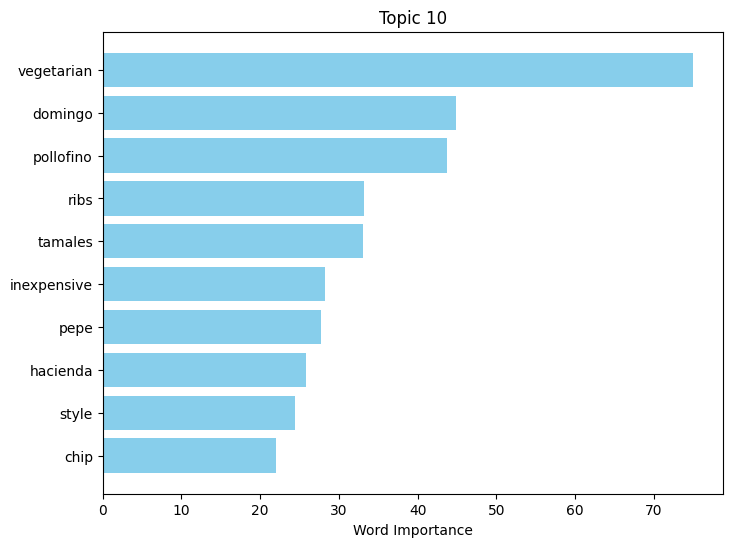

In [49]:
import matplotlib.pyplot as plt

# Get the topic-word distributions from the LDA model
topic_word_distributions = lda_model.components_

# Get the feature names (words) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Define the number of top words to display for each topic
num_top_words = 10

# Plot the top words for each topic
for topic_idx, topic in enumerate(topic_word_distributions):
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_word_indices]
    plt.figure(figsize=(8, 6))
    plt.barh(range(num_top_words), topic[top_word_indices], align='center', color='skyblue')
    plt.yticks(range(num_top_words), top_words)
    plt.xlabel('Word Importance')
    plt.title(f'Topic {topic_idx + 1}')
    plt.gca().invert_yaxis()
    plt.show()

# **Content Based Recommendation System**

In [50]:
!pip install sentence-transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 3.1 MB/s eta 0:00:00


In [51]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
X = np.array(mexican_df.text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning:

TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()



tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [54]:
embeddings = model.encode(text_data, show_progress_bar=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/122 [00:00<?, ?it/s]

In [55]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4
0,7.298535,-0.866972,-0.552999,-2.153259,0.568751
1,7.580376,3.509523,-0.390837,-1.116123,-1.332315
2,8.153749,1.781633,-2.236266,1.925875,-0.028585
3,7.513854,1.720517,-0.100354,-0.584027,1.636509
4,7.646417,0.853081,0.094145,-0.482184,-0.693870


In [56]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))

def give_recommendations(restaurant_name, print_recommendation=False, print_overview=False, print_genres=False):
    # Find the index of the restaurant with the given name
    index = mexican_df.index[mexican_df['name'] == restaurant_name].tolist()[0]

    index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
    restaurants_recomm = mexican_df['name'].iloc[index_recomm].values
    result = {'Restaurants': restaurants_recomm, 'Index': index_recomm}

    if print_recommendation:
        print('The reviewed restaurant is: %s \n' % (restaurant_name))
        for i, restaurant in enumerate(restaurants_recomm, start=1):
            print(f'Recommended restaurant {i}: {restaurant}')

    if print_overview:
        print('\nThe overview of the reviewed restaurant is:\n%s\n' % (mexican_df['text'].iloc[index]))
        for i, idx in enumerate(index_recomm, start=1):
            overview = mexican_df['text'].iloc[idx]
            print(f'The overview of the recommended restaurant {i} is:\n{overview}\n')

    if print_genres:
        print('The categories of the reviewed restaurant are:\n%s\n' % (mexican_df['categories'].iloc[index]))
        for i, idx in enumerate(index_recomm, start=1):
            categories = mexican_df['categories'].iloc[idx]
            print(f'The categories of the recommended restaurant {i} are:\n{categories}\n')

    return result

# Example usage:
give_recommendations('Jack in the Box', print_recommendation=True, print_overview=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The reviewed restaurant is: Jack in the Box 

Recommended restaurant 1: Lilly's Tacos
Recommended restaurant 2: Santa Barbara Chicken Ranch
Recommended restaurant 3: New Baja Grill
Recommended restaurant 4: Lilly's Tacos
Recommended restaurant 5: Los Agaves

The overview of the reviewed restaurant is:
The service was fast and friendly. I wasn't in love with their bean and cheese burrito but they have a decent salsa bar and you can't beat their Sunday charburger deal.

The overview of the recommended restaurant 1 is:
My fave tacos in town but then again I am not the biggest taco fan enthusiast. I can def tell when I am in the presence of bad tacos, though. 

Anyways, the food is always great here. My personal favorites are the lengua (beef tongue) and the chicken fajitas. The chicken fajitas are a bit sweet from the bell peppers and onions, which is awesome! The toppings bar is always fresh and clean and limitless, you can have as much salsa/cilantro/onion + cilantro as you can handle! 

{'Restaurants': array(["Lilly's Tacos", 'Santa Barbara Chicken Ranch', 'New Baja Grill',
        "Lilly's Tacos", 'Los Agaves'], dtype=object),
 'Index': [2383, 1530, 3570, 2003, 1181]}

In [57]:
!pip install -q jupyter
!pip install -q nbconvert

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00


In [62]:
!jupyter nbconvert "/content/drive/My Drive/CIS 509/CIS509_FinalProject_Team441" --to html

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[NbConvertApp] WARNING | pattern '/content/drive/My Drive/CIS 509/CIS509_FinalProject_Team441' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [-